<a href="https://colab.research.google.com/github/redinent/ArnavSharma_assignment1/blob/master/mlspring_campassignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random

In [26]:
df = pd.read_csv('Dummy Data HSS.csv')

In [27]:
df['Influencer_number'] = df['Influencer'].apply(lambda x: 4 if x=="Mega" else 3 if x=="Micro" else 2 if x=="Nano" else 1)

In [28]:
df.tail(20)

,TV,Radio,Social Media,Influencer,Sales,Influencer_number
4552,60.0,15.569813,0.539963,Macro,219.148518,1
4553,18.0,9.845451,3.252628,Mega,65.274236,4
4554,66.0,16.786786,3.787461,Micro,238.711543,3
4555,88.0,35.544561,7.522555,Macro,309.903896,1
4556,85.0,24.181104,2.542531,Mega,301.994116,4
4557,55.0,23.718462,4.222898,Mega,194.207735,4
4558,12.0,6.240950,2.194814,Mega,41.710366,4
4559,41.0,6.723993,2.762773,Nano,149.345618,2
4560,14.0,0.021883,0.301150,Micro,53.702021,3
4561,60.0,21.841864,5.092528,Macro,210.680016,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TV                 4562 non-null   float64
 1   Radio              4568 non-null   float64
 2   Social Media       4566 non-null   float64
 3   Influencer         4572 non-null   object 
 4   Sales              4566 non-null   float64
 5   Influencer_number  4572 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 214.4+ KB


In [30]:
df.dropna(inplace = True)

In [31]:
y=df['Sales']
X = df[['TV','Radio','Influencer_number','Social Media']]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4546 entries, 0 to 4571
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TV                 4546 non-null   float64
 1   Radio              4546 non-null   float64
 2   Social Media       4546 non-null   float64
 3   Influencer         4546 non-null   object 
 4   Sales              4546 non-null   float64
 5   Influencer_number  4546 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 248.6+ KB


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Influencer_number'}>,
        <Axes: title={'center': 'Social Media'}>]], dtype=object)

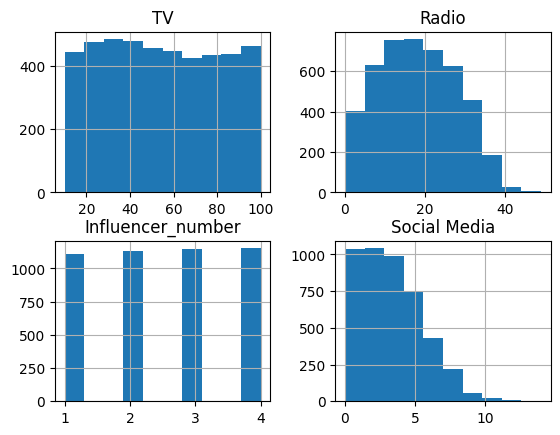

In [33]:
X.hist(bins=10)


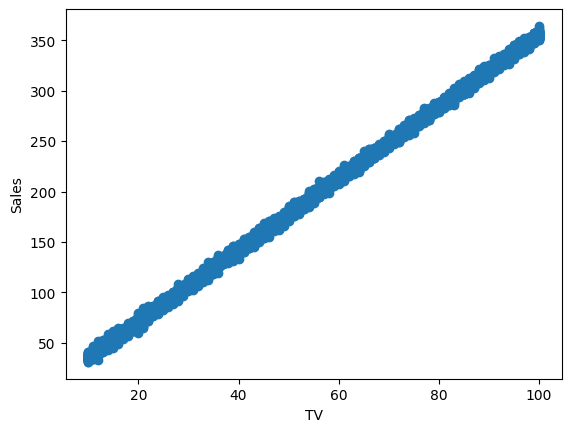

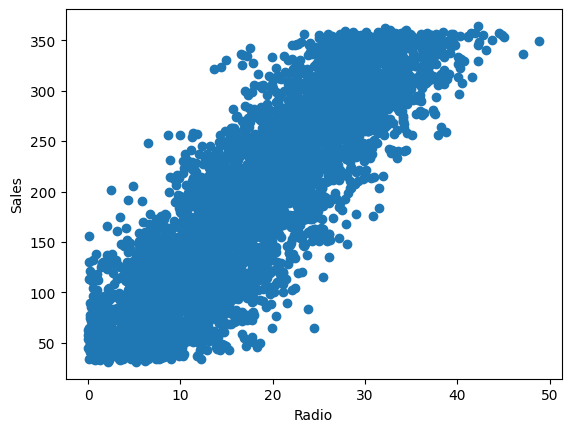

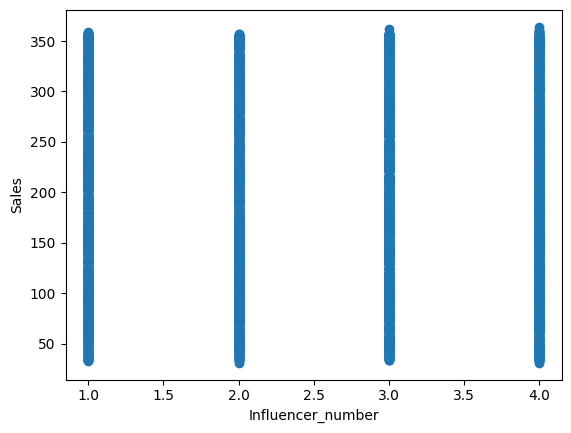

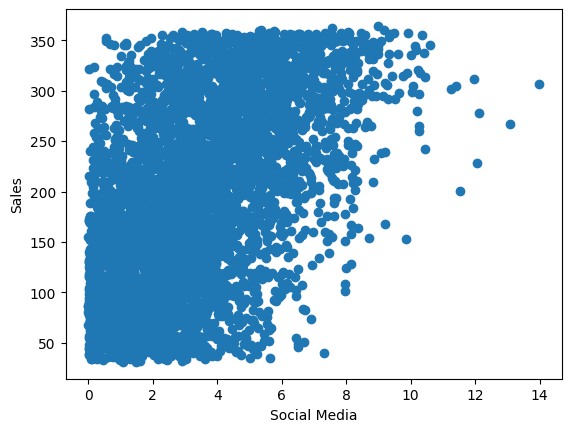

In [34]:

for col in X:
  plt.scatter(X[col],y)
  plt.xlabel(col)
  plt.ylabel('Sales')
  plt.show()


In [35]:
  class LinearRegression():

    def __init__(self, learning_rate):
      self.learning_rate = learning_rate
    def fit(self, X, y):
      X=X.copy()
      X.insert(loc=0,column='base',value=np.full((X.shape[0],1),1))
      X=X.values
      y=y.copy().values


      weight = np.random.rand(X.shape[1])
      epochs = 500
      batch_size = 32
      for i in range(epochs):
        a = random.randint(0,X.shape[0]-1-batch_size);
        b=a+batch_size
        X_batch = X[a:b]
        y_batch = y[a:b]
        y_pred = np.dot(X_batch,weight)
        error = y_batch-y_pred
        gradient = -np.dot(X_batch.transpose(),error)/batch_size
        weight = weight - self.learning_rate*gradient
      return weight

    def predict(self,X,weight):
      X=X.copy()
      X.insert(loc=0,column='base',value=np.full((X.shape[0],1),1))
      return np.dot(X.values,weight)







In [36]:
X=(X-X.mean(axis=0))/X.std(axis=0)

In [37]:

X_train = X[:int(X.shape[0]/2)]
y_train = y[:int(y.shape[0]/2)]
X_test = X[int(X.shape[0]/2):]
y_test = y[int(y.shape[0]/2):]

In [42]:
training = LinearRegression(0.06)
training_weight = training.fit(X_train,y_train)
testing = LinearRegression(0.06)
testing_prediction = testing.predict(X_test,training_weight)

In [43]:
testing_prediction

array([337.93173604, 135.25556347, 234.97648641, ..., 156.97239429,
       252.05974803, 149.63375376])

In [44]:
y_test

,Sales
2299,337.795953
2300,138.674470
2301,236.322331
2302,36.831510
2303,166.783380
...,...
4567,94.685866
4568,249.101915
4569,163.631457
4570,253.610411
